In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('./data/gurgaon_properties_missing_value_imputation.csv')
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [74]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [75]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [76]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


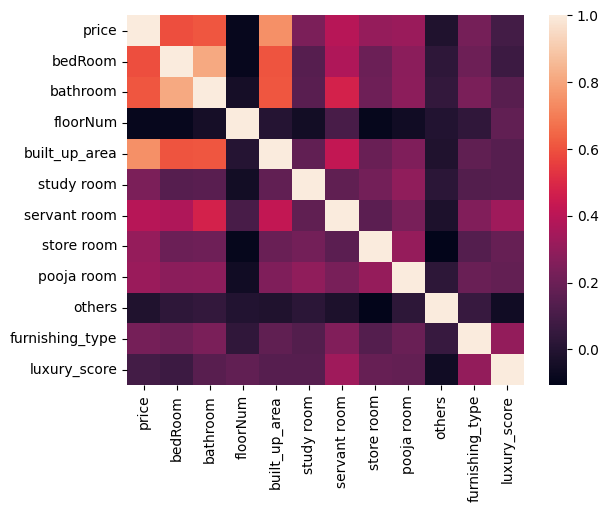

In [77]:
sns.heatmap(train_df.corr(numeric_only=True))
plt.show()

In [78]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [79]:
train_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

# Columns in question for feature selection
Already Good (Numeric Columns) : built_up_area, bathroom, bedRoom,   servant room ,  pooja room, store room , study room 
            
Not Sure (Numeric Columns): furnishing_type, luxury_score, others, floorNum
Not Sure (Categorical Columns): property_type, sector, balcony, agePossession

luxury_score into categorical variable

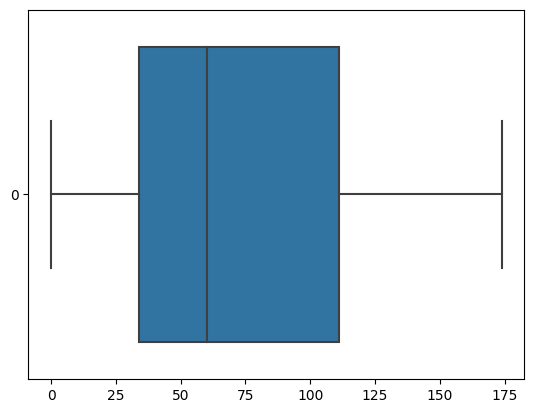

In [80]:
sns.boxplot(train_df['luxury_score'], orient='h')
plt.show()

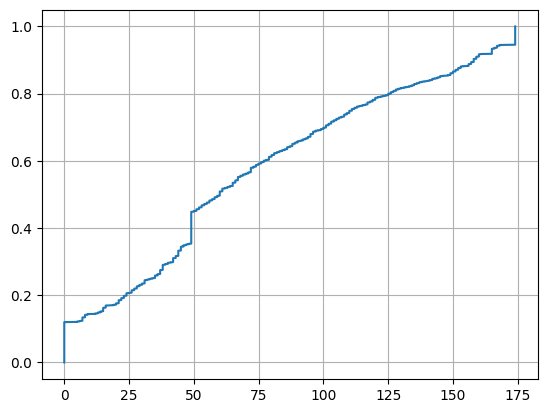

In [81]:
data = train_df['luxury_score']

x = np.sort(data)
# Calculate the CDF values
y = np.arange(len(data)) / float(len(data))

plt.plot(x,y)
plt.grid(True)
plt.show()

In [82]:
def luxury_category(luxury):
    if 0 <= luxury <50:
        return 'Low'
    elif 50 <= luxury <150:
        return 'Medium'
    elif 150 <= luxury <=175:
        return 'Hight'
    else:
        return None

In [83]:
train_df['luxury_category'] = train_df['luxury_score'].apply(luxury_category)

In [84]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,Hight
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,Hight


floorNum into categorical variable

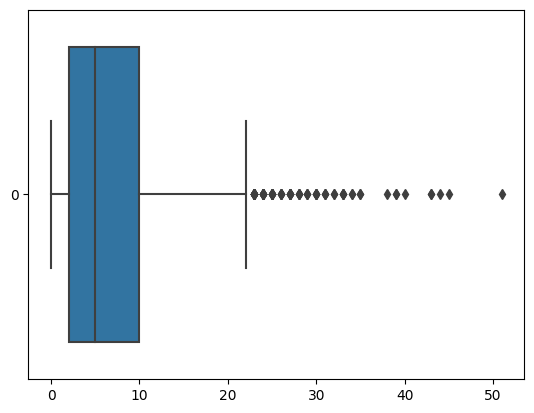

In [85]:
sns.boxplot(train_df['floorNum'], orient='h')
plt.show()

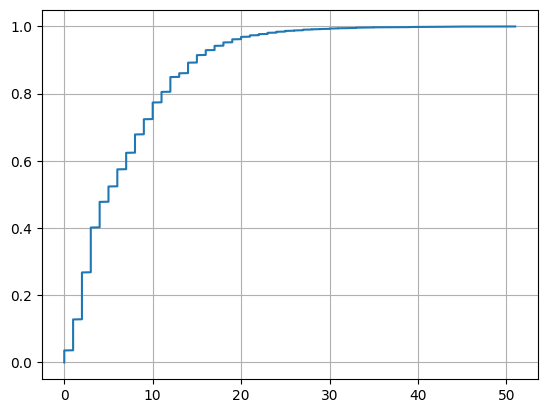

In [86]:
data = train_df['floorNum']

x = np.sort(data)
# Calculate the CDF values
y = np.arange(len(data)) / float(len(data))

plt.plot(x,y)
plt.grid(True)
plt.show()

In [87]:
def floor_category(luxury):
    if 0 <= luxury <=2:
        return 'Low Floor'
    elif 3 <= luxury <=10:
        return 'Med Floor'
    elif 11 <= luxury <=51:
        return 'Hight Floor'
    else:
        return None

In [88]:
train_df['floor_category'] = train_df['floorNum'].apply(floor_category)

In [89]:
train_df.drop(columns=['floorNum', 'luxury_score'], inplace=True)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Med Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Hight Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,Hight,Med Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,Hight,Med Floor


In [96]:
from sklearn.preprocessing import OrdinalEncoder
# keep a backup of data
data_label_encoded = train_df.copy()

# select dataframes slice with specified data types
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])

In [97]:
data_label_encoded.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,0.82,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,101.0,0.95,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,111.0,0.32,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,105.0,1.60,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,4.0,0.48,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [98]:
x_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']

In [106]:
x_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,101.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,111.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,105.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,4.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
